## Load Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('online_shoppers_intention.csv')
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [2]:
# Working copy for processing
df_clean = df.copy()


## Overview


In [3]:
df_clean.shape
df_clean.columns


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [4]:
df_clean.dtypes


Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
df_clean.isna().sum().sort_values(ascending=False)


Administrative             0
Administrative_Duration    0
Weekend                    0
VisitorType                0
TrafficType                0
Region                     0
Browser                    0
OperatingSystems           0
Month                      0
SpecialDay                 0
PageValues                 0
ExitRates                  0
BounceRates                0
ProductRelated_Duration    0
ProductRelated             0
Informational_Duration     0
Informational              0
Revenue                    0
dtype: int64

In [6]:
# Check duplicate rows (exact matches)
dup_mask = df_clean.duplicated(keep=False)
dup_count = dup_mask.sum()
dup_pct = (dup_count / len(df_clean)).round(4)
dup_groups = df_clean[dup_mask].groupby(list(df_clean.columns)).size().sort_values(ascending=False)
dup_groups.head(10)

dup_count, dup_pct


(201, 0.0163)

In [7]:
# Remove exact duplicate rows (only once)
before = len(df_clean)
df_clean = df_clean.drop_duplicates().reset_index(drop=True)
after = len(df_clean)
removed = before - after
before, after, removed


(12330, 12205, 125)

In [8]:
df_clean.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Administrative,12205.0,NaN,NaN,NaN,2.338878,3.330436,0.0,0.0,1.0,4.0,27.0
Administrative_Duration,12205.0,NaN,NaN,NaN,81.646331,177.491845,0.0,0.0,9.0,94.7,3398.75
Informational,12205.0,NaN,NaN,NaN,0.508726,1.275617,0.0,0.0,0.0,0.0,24.0
Informational_Duration,12205.0,NaN,NaN,NaN,34.825454,141.424807,0.0,0.0,0.0,0.0,2549.375
ProductRelated,12205.0,NaN,NaN,NaN,32.045637,44.593649,0.0,8.0,18.0,38.0,705.0
ProductRelated_Duration,12205.0,NaN,NaN,NaN,1206.982457,1919.6014,0.0,193.0,608.942857,1477.154762,63973.52223
BounceRates,12205.0,NaN,NaN,NaN,0.02037,0.045255,0.0,0.0,0.002899,0.016667,0.2
ExitRates,12205.0,NaN,NaN,NaN,0.041466,0.046163,0.0,0.014231,0.025,0.048529,0.2
PageValues,12205.0,NaN,NaN,NaN,5.949574,18.653671,0.0,0.0,0.0,0.0,361.763742
SpecialDay,12205.0,NaN,NaN,NaN,0.061942,0.199666,0.0,0.0,0.0,0.0,1.0


## Distributions


In [9]:
# Categorical distributions
cat_cols = df_clean.select_dtypes(include=['object', 'category', 'bool']).columns
{col: df_clean[col].value_counts(dropna=False) for col in cat_cols}


{'Month': Month
 May     3329
 Nov     2982
 Mar     1860
 Dec     1706
 Oct      549
 Sep      448
 Aug      433
 Jul      432
 June     285
 Feb      181
 Name: count, dtype: int64,
 'VisitorType': VisitorType
 Returning_Visitor    10431
 New_Visitor           1693
 Other                   81
 Name: count, dtype: int64,
 'Weekend': Weekend
 False    9346
 True     2859
 Name: count, dtype: int64,
 'Revenue': Revenue
 False    10297
 True      1908
 Name: count, dtype: int64}

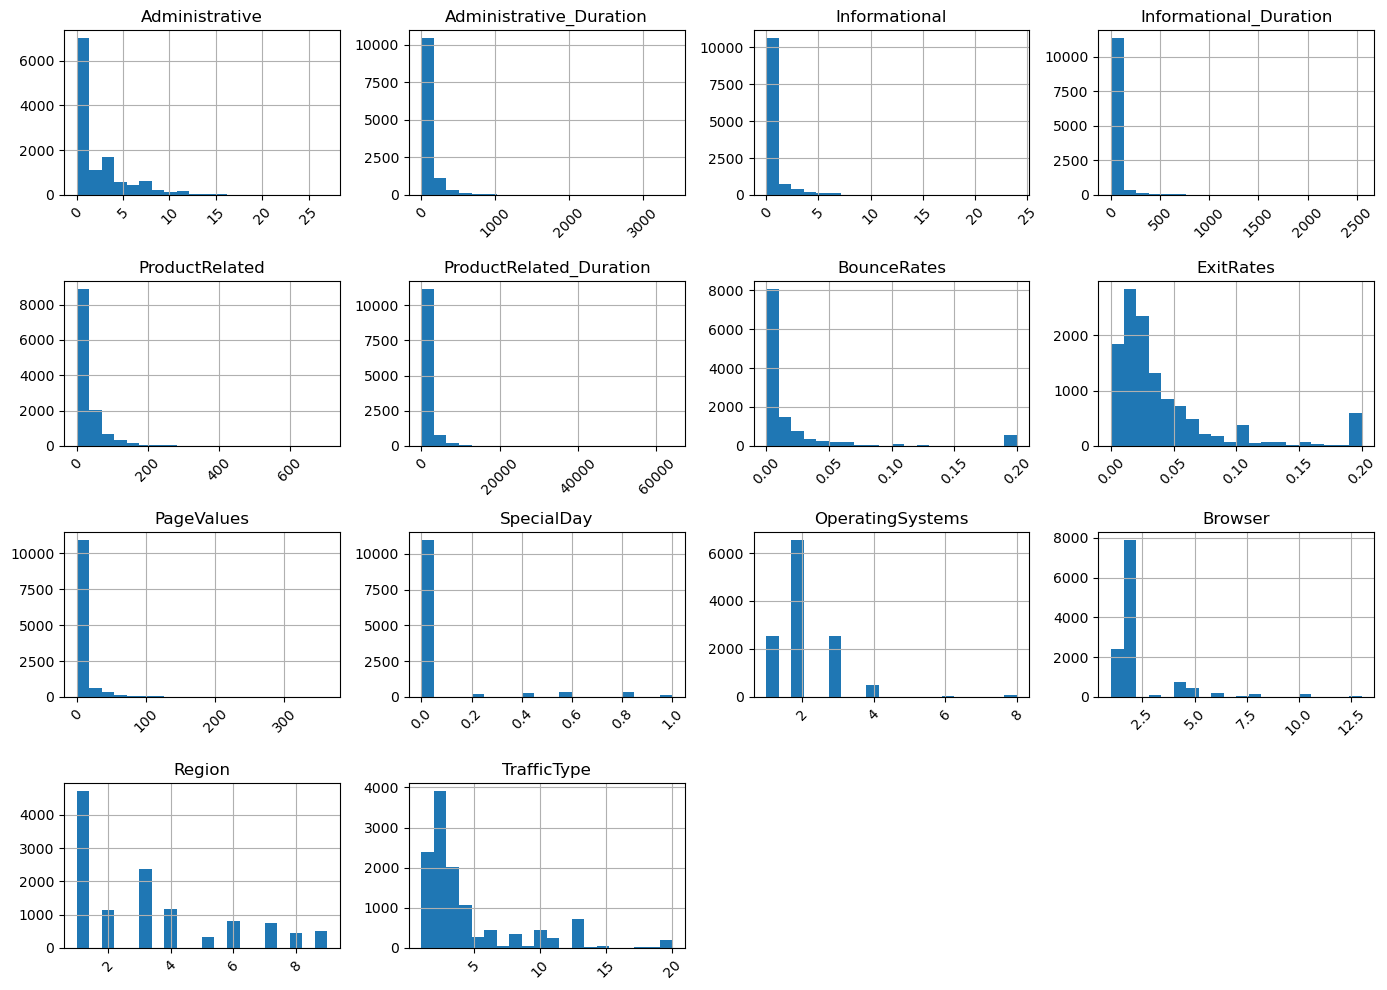

In [10]:
# Numeric distributions
num_cols = df_clean.select_dtypes(include='number').columns
axes = df_clean[num_cols].hist(figsize=(14, 10), bins=20, layout=(4, 4))
for ax in axes.flatten():
    if ax is not None:
        ax.tick_params(axis='x', labelrotation=45)
plt.tight_layout()


## Outliers


In [11]:
# IQR outlier summary (numeric meaningful columns only)
outlier_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]
q1 = df_clean[outlier_cols].quantile(0.25)
q3 = df_clean[outlier_cols].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_mask = (df_clean[outlier_cols] < lower) | (df_clean[outlier_cols] > upper)
outlier_summary = outlier_mask.sum().sort_values(ascending=False)
outlier_pct = (outlier_summary / len(df_clean)).round(4)
outlier_table = pd.DataFrame({'outlier_count': outlier_summary, 'outlier_pct': outlier_pct})
outlier_table


,outlier_count,outlier_pct
PageValues,2730,0.2237
Informational,2631,0.2156
Informational_Duration,2405,0.1971
BounceRates,1428,0.1170
ExitRates,1325,0.1086
SpecialDay,1249,0.1023
Administrative_Duration,1149,0.0941
ProductRelated,1007,0.0825
ProductRelated_Duration,951,0.0779
Administrative,404,0.0331


In [12]:
# Outlier handling
clip_01_cols = ['BounceRates', 'ExitRates', 'SpecialDay']
for col in clip_01_cols:
    df_clean[col] = df_clean[col].clip(0, 1)

clip_p99_cols = [
    'Administrative', 'Informational', 'ProductRelated',
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
    'PageValues'
]
for col in clip_p99_cols:
    p99 = df_clean[col].quantile(0.99)
    df_clean[col] = df_clean[col].clip(upper=p99)

df_clean[clip_01_cols + clip_p99_cols].describe().T[['min', 'max', 'mean', 'std']]


,min,max,mean,std
BounceRates,0.0,0.200000,0.020370,0.045255
ExitRates,0.0,0.200000,0.041466,0.046163
SpecialDay,0.0,1.000000,0.061942,0.199666
Administrative,0.0,14.000000,2.309218,3.199232
Informational,0.0,6.000000,0.490455,1.154280
ProductRelated,0.0,221.000000,31.127735,38.331027
Administrative_Duration,0.0,838.704889,77.021957,142.728817
Informational_Duration,0.0,722.379200,30.696256,105.268590
ProductRelated_Duration,0.0,8704.271573,1164.588940,1555.729802
PageValues,0.0,86.108689,5.496011,14.942396


## EDA


In [13]:
# Clean visual style
sns.set_theme(style='whitegrid', context='notebook')


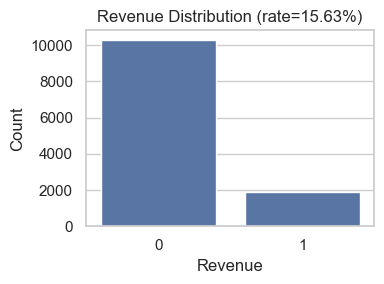

In [14]:
# Revenue distribution and rate
rev_counts = df_clean['Revenue'].value_counts().sort_index()
rev_rate = df_clean['Revenue'].mean()

fig, ax = plt.subplots(figsize=(4, 3))
sns.barplot(x=rev_counts.index.astype(int), y=rev_counts.values, ax=ax, color='#4C72B0')
ax.set_title(f'Revenue Distribution (rate={rev_rate:.2%})')
ax.set_xlabel('Revenue')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()


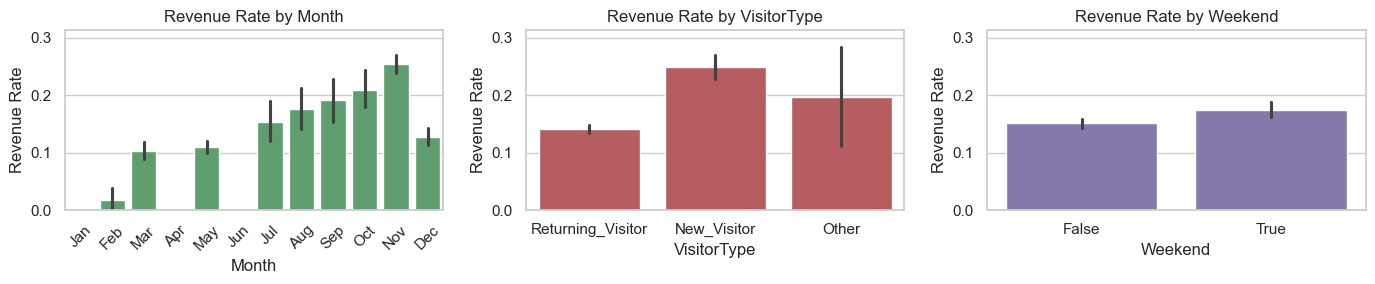

In [15]:
# Revenue rate by categorical segments
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
fig, axes = plt.subplots(1, 3, figsize=(14, 3))
sns.barplot(x='Month', y='Revenue', data=df_clean, order=month_order, ax=axes[0], color='#55A868')
axes[0].set_title('Revenue Rate by Month')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='VisitorType', y='Revenue', data=df_clean, ax=axes[1], color='#C44E52')
axes[1].set_title('Revenue Rate by VisitorType')

sns.barplot(x='Weekend', y='Revenue', data=df_clean, ax=axes[2], color='#8172B3')
axes[2].set_title('Revenue Rate by Weekend')

for ax in axes:
    ax.set_ylabel('Revenue Rate')
    ax.set_ylim(0, df_clean['Revenue'].mean() * 2 if df_clean['Revenue'].mean() > 0 else 1)

plt.tight_layout()
plt.show()


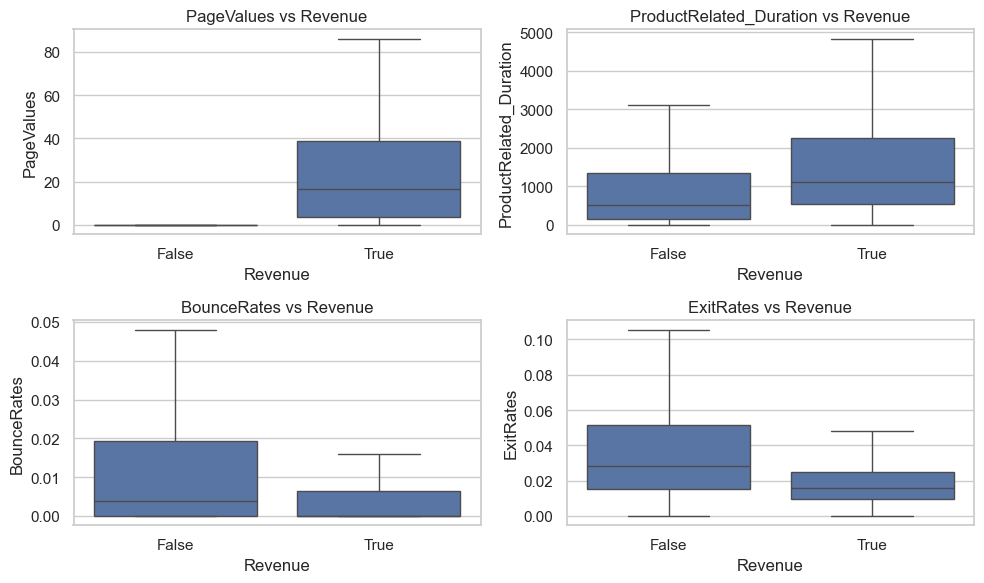

In [16]:
# Key numeric features vs Revenue (clean boxplots)
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
sns.boxplot(x='Revenue', y='PageValues', data=df_clean, ax=axes[0, 0], showfliers=False)
axes[0, 0].set_title('PageValues vs Revenue')
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df_clean, ax=axes[0, 1], showfliers=False)
axes[0, 1].set_title('ProductRelated_Duration vs Revenue')
sns.boxplot(x='Revenue', y='BounceRates', data=df_clean, ax=axes[1, 0], showfliers=False)
axes[1, 0].set_title('BounceRates vs Revenue')
sns.boxplot(x='Revenue', y='ExitRates', data=df_clean, ax=axes[1, 1], showfliers=False)
axes[1, 1].set_title('ExitRates vs Revenue')
plt.tight_layout()
plt.show()


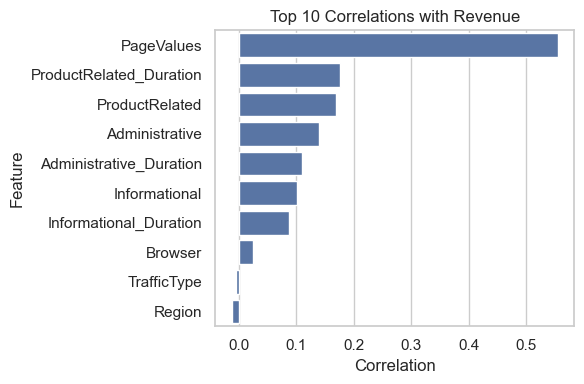

In [17]:
# Top correlations with Revenue
num_df = df_clean.select_dtypes(include='number').copy()
if 'Revenue' not in num_df.columns:
    num_df['Revenue'] = df_clean['Revenue'].astype(int)
corr_rev = num_df.corr(numeric_only=True)['Revenue'].sort_values(ascending=False)
top_corr = corr_rev.drop('Revenue').head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x=top_corr.values, y=top_corr.index, color='#4C72B0')
plt.title('Top 10 Correlations with Revenue')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Correlation


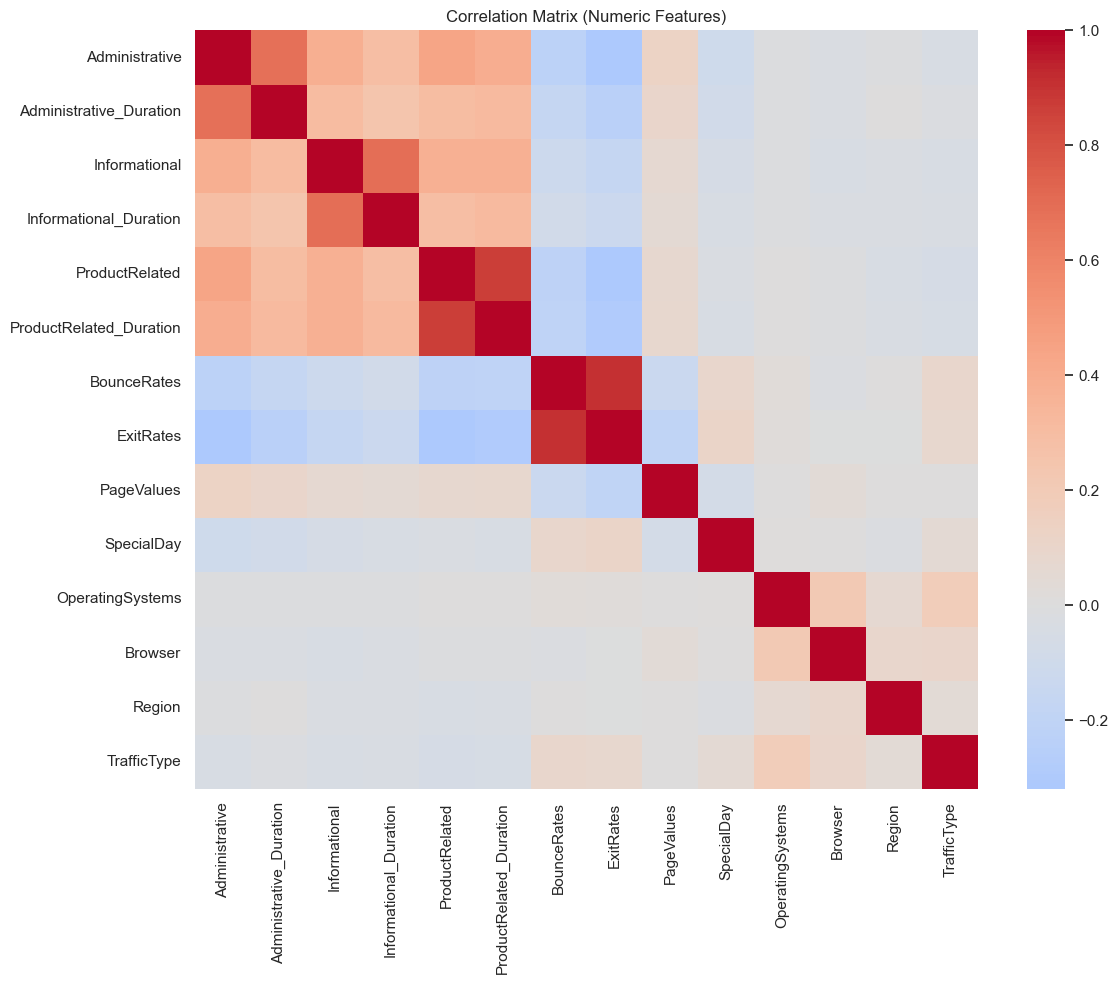

BounceRates     ExitRates                  0.902144
ProductRelated  ProductRelated_Duration    0.870249
Informational   Informational_Duration     0.686949
Administrative  Administrative_Duration    0.684665
                ProductRelated             0.440552
                ProductRelated_Duration    0.394693
                Informational              0.381454
Informational   ProductRelated_Duration    0.379471
                ProductRelated             0.378314
Administrative  ExitRates                  0.319570
dtype: float64

In [18]:
# Correlation matrix and top 10 absolute correlations
num_df = df_clean.select_dtypes(include='number')
corr = num_df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Numeric Features)')
plt.tight_layout()
plt.show()

corr_abs = corr.abs()
mask = np.triu(np.ones_like(corr_abs, dtype=bool), k=1)
top10 = corr_abs.where(mask).stack().sort_values(ascending=False).head(10)
top10


## Encoding


In [19]:
# Label encoding according to agreed mapping
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
visit_map = {'Other': 0, 'New Visitor': 1, 'Returning Visitor': 2}
bool_map = {False: 0, True: 1}

df_clean['Month'] = df_clean['Month'].map(month_map)
df_clean['VisitorType'] = df_clean['VisitorType'].map(visit_map)
df_clean['Weekend'] = df_clean['Weekend'].map(bool_map)
df_clean['Revenue'] = df_clean['Revenue'].map(bool_map)

df_clean[['Month', 'VisitorType', 'Weekend', 'Revenue']].head()


,Month,VisitorType,Weekend,Revenue
0,2.0,NaN,0,0
1,2.0,NaN,0,0
2,2.0,NaN,0,0
3,2.0,NaN,0,0
4,2.0,NaN,1,0


## Classification

### Logistic Regression

- Stratify
- Train/test split

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_auc_score, accuracy_score

# load dataframe
df_model = df_clean.copy()

# Selecting target and feature columns
y = df_model['Revenue'].astype(int)
X = df_model.drop(columns=['Revenue'])

# train/test split (stratify to keep class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print('Split complete:', X_train.shape, X_test.shape)

Split complete: (9764, 17) (2441, 17)


- Preprocessor
- Hyperparameters:
    - max iter
    - l1 ratio (Elastic-Net mixing)
    - solver
- RandomSearch:
    - scoring
    - cv
    - n_iter

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform, uniform

preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=5000,
        random_state=42,
        solver="saga"
    ))
])

# Tune C + l1_ratio
param_dist_logreg = {
    'classifier__C': loguniform(1e-4, 1e2),
    'classifier__l1_ratio': uniform(0.0, 1.0)
}

gs_logreg = RandomizedSearchCV(
    logreg_pipeline,
    param_distributions=param_dist_logreg,
    n_iter=40,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

gs_logreg.fit(X_train, y_train)

print("Best LogisticRegression params:")
print(gs_logreg.best_params_)


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best LogisticRegression params:
{'classifier__C': 0.006724850206557251, 'classifier__l1_ratio': 0.09767211400638387}


d:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(



Classification report (Logistic Regression):
              precision    recall  f1-score   support

           0     0.8907    0.9815    0.9339      2059
           1     0.7791    0.3508    0.4838       382

    accuracy                         0.8828      2441
   macro avg     0.8349    0.6662    0.7088      2441
weighted avg     0.8732    0.8828    0.8635      2441

ROC AUC: 0.8978841454576892


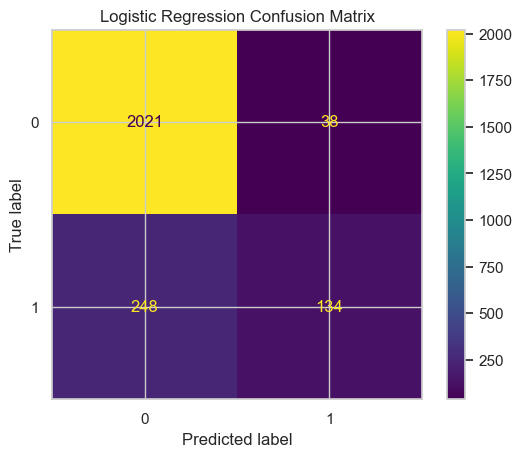

In [22]:
# Evaluate on test set
y_pred = gs_logreg.predict(X_test)
probs = gs_logreg.predict_proba(X_test)[:,1]
print('\nClassification report (Logistic Regression):')
print(classification_report(y_test, y_pred, digits=4))
print('ROC AUC:', roc_auc_score(y_test, probs))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(gs_logreg, X_test, y_test)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

### Decision Tree

In [23]:
# Decision Tree with GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

dt_pipeline = Pipeline(steps=[('preproc', preprocessor), ('classifier', DecisionTreeClassifier(random_state=42))])

param_grid_dt = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 3, 5, 7, 10, 20],
    'classifier__min_samples_split': [2, 5, 10, 20],
    'classifier__min_samples_leaf': [1, 2, 4, 8],
    'classifier__max_features': [None, 'sqrt', 'log2', 0.5]
}

gs_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
gs_dt.fit(X_train, y_train)

print('Best DecisionTree params:')
print(gs_dt.best_params_)

Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best DecisionTree params:
{'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__max_features': None, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}



Classification report (Decision Tree):
              precision    recall  f1-score   support

           0     0.9295    0.9475    0.9384      2059
           1     0.6842    0.6126    0.6464       382

    accuracy                         0.8951      2441
   macro avg     0.8069    0.7801    0.7924      2441
weighted avg     0.8911    0.8951    0.8927      2441

ROC AUC: 0.9237430359372338


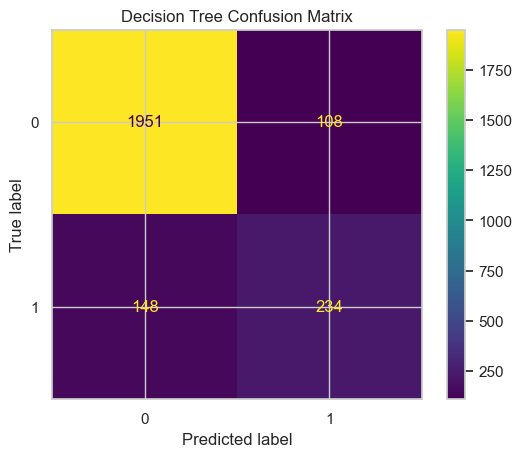

In [24]:
# Evaluate on test set
y_pred_dt = gs_dt.predict(X_test)
probs_dt = gs_dt.predict_proba(X_test)[:,1]
print('\nClassification report (Decision Tree):')
print(classification_report(y_test, y_pred_dt, digits=4))
print('ROC AUC:', roc_auc_score(y_test, probs_dt))

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(gs_dt, X_test, y_test)
plt.title('Decision Tree Confusion Matrix')
plt.show()

## Clustering


### K-Means Clustering


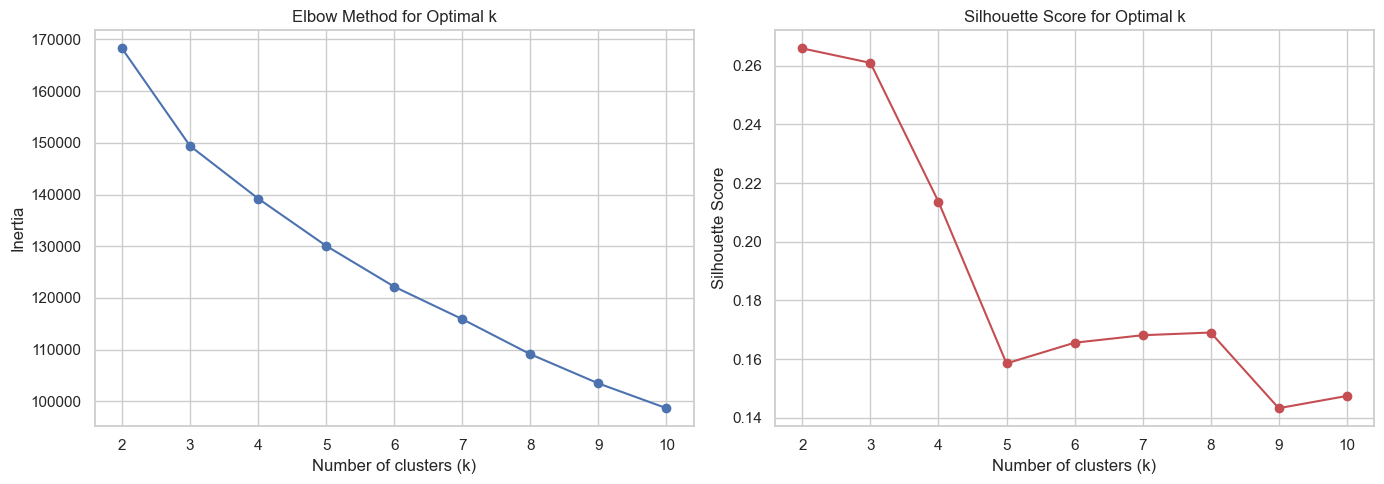

Optimal number of clusters (based on silhouette score): 2
Silhouette scores: {2: 0.26588436712283875, 3: 0.2609551454475504, 4: 0.21364454633155336, 5: 0.15851589982941558, 6: 0.16557543881482284, 7: 0.16813064967557528, 8: 0.1690484472380087, 9: 0.14326440865622458, 10: 0.14742627446474887}


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.cm as cm

# Prepare data for clustering (use all features except Revenue)
X_cluster = df_clean.drop(columns=['Revenue']).copy()

# Apply preprocessing
X_cluster_scaled = preprocessor.fit_transform(X_cluster)

# Determine optimal number of clusters using Elbow method and Silhouette score
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_cluster_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_cluster_scaled, kmeans.labels_))

# Plot Elbow method
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].plot(K_range, inertias, 'bo-')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal k')
axes[0].grid(True)

# Plot Silhouette scores
axes[1].plot(K_range, silhouette_scores, 'ro-')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score for Optimal k')
axes[1].grid(True)
plt.tight_layout()
plt.show()

# Find optimal k (highest silhouette score)
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f'Optimal number of clusters (based on silhouette score): {optimal_k}')
print(f'Silhouette scores: {dict(zip(K_range, silhouette_scores))}')


K-Means Silhouette Score: 0.2659


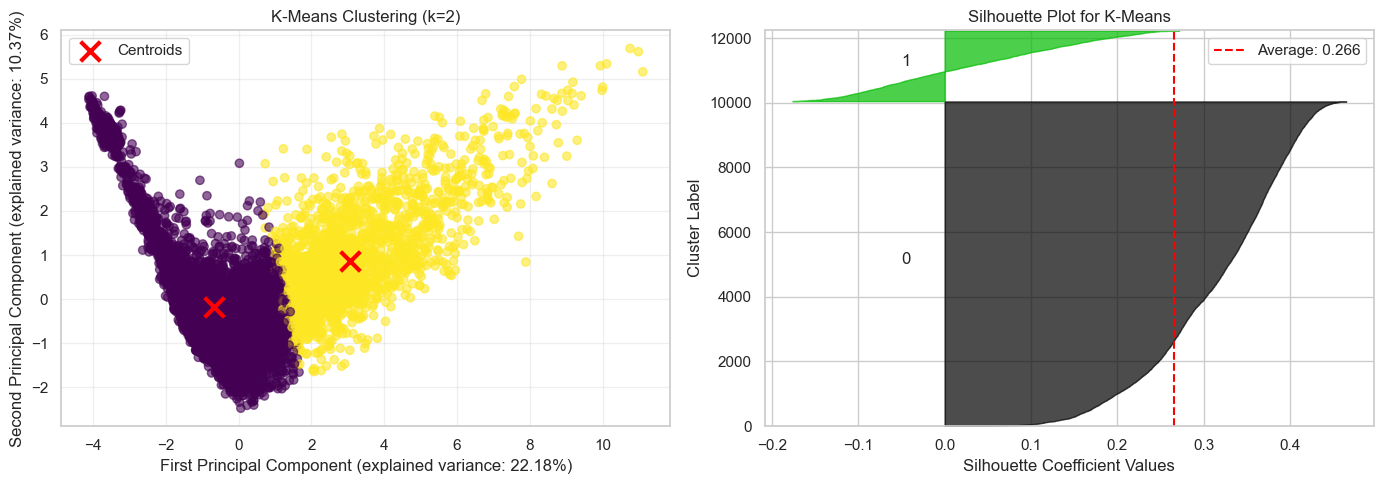


Cluster sizes:
KMeans_Cluster
0    10030
1     2175
Name: count, dtype: int64

Revenue distribution by cluster:
Revenue                0         1
KMeans_Cluster                    
0               0.869791  0.130209
1               0.723218  0.276782


In [26]:
# Fit K-Means with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_cluster_scaled)

# Calculate silhouette score
silhouette_avg = silhouette_score(X_cluster_scaled, kmeans_labels)
print(f'K-Means Silhouette Score: {silhouette_avg:.4f}')

# Visualize clusters using PCA (reduce to 2D for visualization)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_cluster_scaled)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot clusters
scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
axes[0].scatter(kmeans.cluster_centers_[:, 0] if X_cluster_scaled.shape[1] == 2 else 
                pca.transform(kmeans.cluster_centers_)[:, 0],
                kmeans.cluster_centers_[:, 1] if X_cluster_scaled.shape[1] == 2 else 
                pca.transform(kmeans.cluster_centers_)[:, 1],
                c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[0].set_xlabel(f'First Principal Component (explained variance: {pca.explained_variance_ratio_[0]:.2%})')
axes[0].set_ylabel(f'Second Principal Component (explained variance: {pca.explained_variance_ratio_[1]:.2%})')
axes[0].set_title(f'K-Means Clustering (k={optimal_k})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot silhouette analysis
sample_silhouette_values = silhouette_samples(X_cluster_scaled, kmeans_labels)
y_lower = 10
for i in range(optimal_k):
    ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / optimal_k)
    axes[1].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
    axes[1].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axes[1].axvline(x=silhouette_avg, color="red", linestyle="--", label=f'Average: {silhouette_avg:.3f}')
axes[1].set_xlabel('Silhouette Coefficient Values')
axes[1].set_ylabel('Cluster Label')
axes[1].set_title('Silhouette Plot for K-Means')
axes[1].set_ylim([0, len(X_cluster_scaled) + (optimal_k + 1) * 10])
axes[1].legend()
plt.tight_layout()
plt.show()

# Analyze cluster characteristics
df_clustered = df_clean.copy()
df_clustered['KMeans_Cluster'] = kmeans_labels

print('\nCluster sizes:')
print(df_clustered['KMeans_Cluster'].value_counts().sort_index())

print('\nRevenue distribution by cluster:')
print(pd.crosstab(df_clustered['KMeans_Cluster'], df_clustered['Revenue'], normalize='index'))


### DBSCAN Clustering


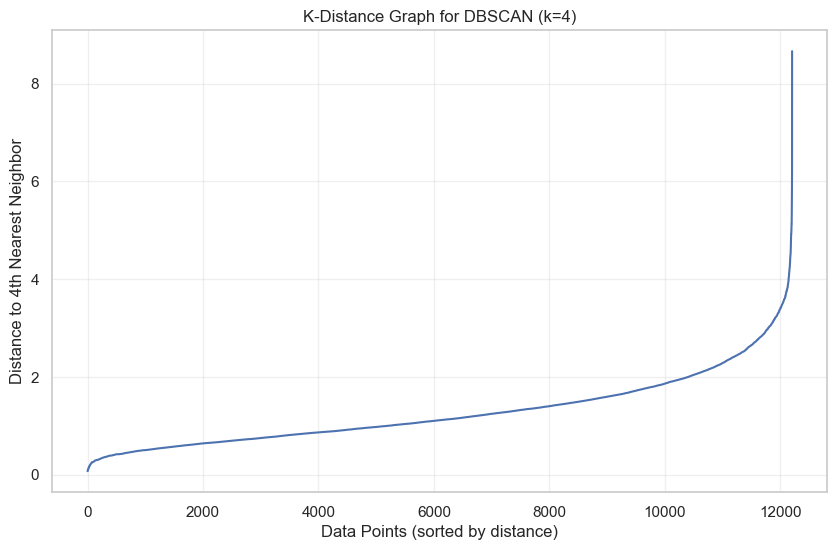

Optimal eps: 2.90
Number of clusters for optimal eps: 6
Number of noise points for optimal eps: 278


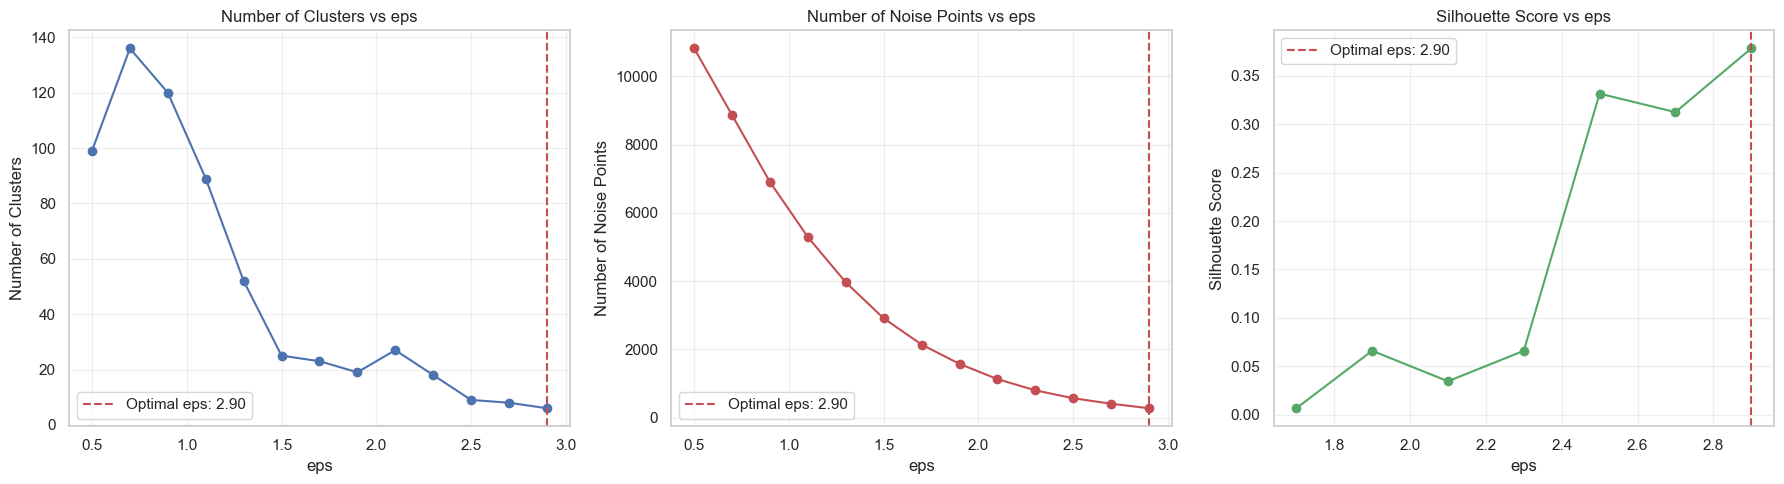

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Use the same preprocessed data
X_dbscan = X_cluster_scaled.copy()

# Find optimal eps using k-distance graph
# Calculate distances to kth nearest neighbor
k = 4  # min_samples parameter
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_dbscan)
distances, indices = neighbors_fit.kneighbors(X_dbscan)

# Sort distances to kth nearest neighbor
distances = np.sort(distances, axis=0)
distances = distances[:, k-1]

# Plot k-distance graph to find elbow
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel(f'Distance to {k}th Nearest Neighbor')
plt.title('K-Distance Graph for DBSCAN (k=4)')
plt.grid(True, alpha=0.3)
plt.show()

# Try different eps values
eps_values = np.arange(0.5, 3.0, 0.2)
n_clusters_list = []
n_noise_list = []
silhouette_scores_dbscan = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=k)
    labels = dbscan.fit_predict(X_dbscan)
    
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    n_clusters_list.append(n_clusters)
    n_noise_list.append(n_noise)
    
    # Calculate silhouette score (only if we have more than 1 cluster and not all noise)
    if n_clusters > 1 and n_noise < len(labels) * 0.5:
        # Filter out noise points for silhouette calculation
        mask = labels != -1
        if np.sum(mask) > 1:
            try:
                sil_score = silhouette_score(X_dbscan[mask], labels[mask])
                silhouette_scores_dbscan.append(sil_score)
            except:
                silhouette_scores_dbscan.append(-1)
        else:
            silhouette_scores_dbscan.append(-1)
    else:
        silhouette_scores_dbscan.append(-1)

# Find optimal eps (balance between number of clusters and noise points)
# Choose eps that gives reasonable number of clusters (2-8) and low noise
valid_indices = [i for i, (nc, nn) in enumerate(zip(n_clusters_list, n_noise_list)) 
                 if 2 <= nc <= 8 and nn < len(X_dbscan) * 0.3 and silhouette_scores_dbscan[i] > 0]

if valid_indices:
    # Choose eps with highest silhouette score among valid options
    best_idx = valid_indices[np.argmax([silhouette_scores_dbscan[i] for i in valid_indices])]
    optimal_eps = eps_values[best_idx]
else:
    # Fallback: choose eps that gives 3-5 clusters with reasonable noise
    best_idx = None
    for i, (nc, nn) in enumerate(zip(n_clusters_list, n_noise_list)):
        if 3 <= nc <= 5 and nn < len(X_dbscan) * 0.2:
            best_idx = i
            break
    if best_idx is None:
        optimal_eps = 1.5  # Default value
    else:
        optimal_eps = eps_values[best_idx]

print(f'Optimal eps: {optimal_eps:.2f}')

# Use best_idx if available, otherwise find the closest index
if best_idx is not None:
    optimal_idx = best_idx
else:
    # Find the index of the closest eps value
    optimal_idx = np.argmin(np.abs(eps_values - optimal_eps))

print(f'Number of clusters for optimal eps: {n_clusters_list[optimal_idx]}')
print(f'Number of noise points for optimal eps: {n_noise_list[optimal_idx]}')

# Plot results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].plot(eps_values, n_clusters_list, 'bo-')
axes[0].axvline(x=optimal_eps, color='r', linestyle='--', label=f'Optimal eps: {optimal_eps:.2f}')
axes[0].set_xlabel('eps')
axes[0].set_ylabel('Number of Clusters')
axes[0].set_title('Number of Clusters vs eps')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(eps_values, n_noise_list, 'ro-')
axes[1].axvline(x=optimal_eps, color='r', linestyle='--', label=f'Optimal eps: {optimal_eps:.2f}')
axes[1].set_xlabel('eps')
axes[1].set_ylabel('Number of Noise Points')
axes[1].set_title('Number of Noise Points vs eps')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

valid_sil = [s if s > 0 else np.nan for s in silhouette_scores_dbscan]
axes[2].plot(eps_values, valid_sil, 'go-')
axes[2].axvline(x=optimal_eps, color='r', linestyle='--', label=f'Optimal eps: {optimal_eps:.2f}')
axes[2].set_xlabel('eps')
axes[2].set_ylabel('Silhouette Score')
axes[2].set_title('Silhouette Score vs eps')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


DBSCAN Results:
Number of clusters: 6
Number of noise points: 278 (2.28%)
DBSCAN Silhouette Score (excluding noise): 0.3781


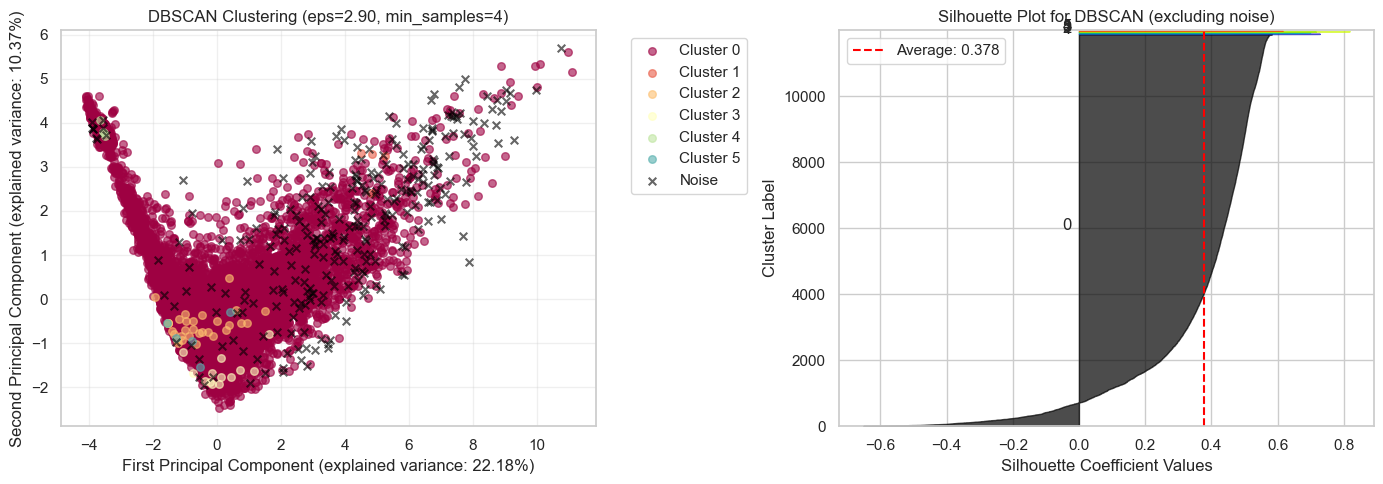


DBSCAN Cluster sizes:
DBSCAN_Cluster
-1      278
 0    11869
 1        4
 2       32
 3       13
 4        4
 5        5
Name: count, dtype: int64

Revenue distribution by cluster (excluding noise):
Revenue                0         1
DBSCAN_Cluster                    
0               0.849018  0.150982
1               1.000000  0.000000
2               0.937500  0.062500
3               0.076923  0.923077
4               1.000000  0.000000
5               0.600000  0.400000


In [28]:
# Fit DBSCAN with optimal parameters
dbscan = DBSCAN(eps=optimal_eps, min_samples=k)
dbscan_labels = dbscan.fit_predict(X_dbscan)

# Calculate metrics
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)

print(f'DBSCAN Results:')
print(f'Number of clusters: {n_clusters_dbscan}')
print(f'Number of noise points: {n_noise_dbscan} ({n_noise_dbscan/len(dbscan_labels)*100:.2f}%)')

# Calculate silhouette score (excluding noise points)
mask = dbscan_labels != -1
if n_clusters_dbscan > 1 and np.sum(mask) > 1:
    silhouette_avg_dbscan = silhouette_score(X_dbscan[mask], dbscan_labels[mask])
    print(f'DBSCAN Silhouette Score (excluding noise): {silhouette_avg_dbscan:.4f}')
else:
    silhouette_avg_dbscan = -1
    print('Cannot calculate silhouette score (too few clusters or too many noise points)')

# Visualize clusters using PCA
X_pca_dbscan = pca.transform(X_dbscan)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot clusters
unique_labels = set(dbscan_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Noise points
        color = 'black'
        marker = 'x'
        label_name = 'Noise'
    else:
        marker = 'o'
        label_name = f'Cluster {label}'
    
    class_member_mask = (dbscan_labels == label)
    xy = X_pca_dbscan[class_member_mask]
    axes[0].scatter(xy[:, 0], xy[:, 1], c=[color], marker=marker, 
                   alpha=0.6, s=30, label=label_name)

axes[0].set_xlabel(f'First Principal Component (explained variance: {pca.explained_variance_ratio_[0]:.2%})')
axes[0].set_ylabel(f'Second Principal Component (explained variance: {pca.explained_variance_ratio_[1]:.2%})')
axes[0].set_title(f'DBSCAN Clustering (eps={optimal_eps:.2f}, min_samples={k})')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(True, alpha=0.3)

# Plot silhouette analysis (if possible)
if n_clusters_dbscan > 1 and np.sum(mask) > 1:
    sample_silhouette_values_dbscan = silhouette_samples(X_dbscan[mask], dbscan_labels[mask])
    y_lower = 10
    
    for i in range(n_clusters_dbscan):
        ith_cluster_silhouette_values = sample_silhouette_values_dbscan[dbscan_labels[mask] == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters_dbscan)
        axes[1].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)
        axes[1].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    
    axes[1].axvline(x=silhouette_avg_dbscan, color="red", linestyle="--", 
                   label=f'Average: {silhouette_avg_dbscan:.3f}')
    axes[1].set_xlabel('Silhouette Coefficient Values')
    axes[1].set_ylabel('Cluster Label')
    axes[1].set_title('Silhouette Plot for DBSCAN (excluding noise)')
    axes[1].set_ylim([0, np.sum(mask) + (n_clusters_dbscan + 1) * 10])
    axes[1].legend()
else:
    axes[1].text(0.5, 0.5, 'Cannot create silhouette plot\n(too few clusters or too many noise points)', 
                ha='center', va='center', transform=axes[1].transAxes, fontsize=12)
    axes[1].set_title('Silhouette Plot for DBSCAN')

plt.tight_layout()
plt.show()

# Analyze cluster characteristics
df_clustered['DBSCAN_Cluster'] = dbscan_labels

print('\nDBSCAN Cluster sizes:')
cluster_counts = df_clustered['DBSCAN_Cluster'].value_counts().sort_index()
print(cluster_counts)

if n_clusters_dbscan > 0:
    print('\nRevenue distribution by cluster (excluding noise):')
    df_clustered_no_noise = df_clustered[df_clustered['DBSCAN_Cluster'] != -1]
    if len(df_clustered_no_noise) > 0:
        print(pd.crosstab(df_clustered_no_noise['DBSCAN_Cluster'], 
                         df_clustered_no_noise['Revenue'], normalize='index'))


### Clustering Comparison


CLUSTERING MODELS COMPARISON

1. K-Means Clustering:
   - Number of clusters: 2
   - Silhouette Score: 0.2659
   - Inertia: 168272.44
   - All points assigned to clusters: Yes

2. DBSCAN Clustering:
   - Number of clusters: 6
   - Noise points: 278 (2.28%)
   - Silhouette Score (excluding noise): 0.3781
   - eps parameter: 2.90
   - min_samples parameter: 4

3. Key Differences:
   - K-Means: Assumes spherical clusters, requires pre-specifying k
   - DBSCAN: Can find clusters of arbitrary shape, identifies noise points
   - K-Means: All points assigned to clusters
   - DBSCAN: Can leave some points as noise


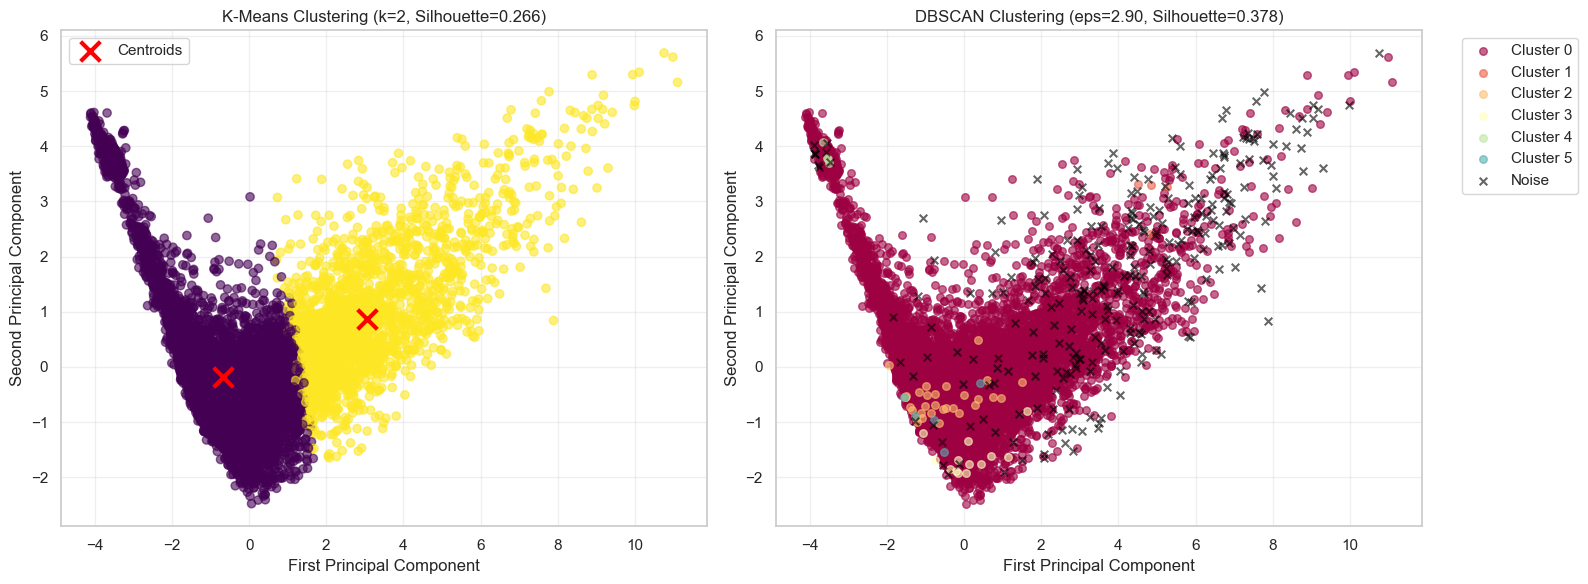

In [29]:
# Compare the two clustering methods
print("=" * 60)
print("CLUSTERING MODELS COMPARISON")
print("=" * 60)

print("\n1. K-Means Clustering:")
print(f"   - Number of clusters: {optimal_k}")
print(f"   - Silhouette Score: {silhouette_avg:.4f}")
print(f"   - Inertia: {kmeans.inertia_:.2f}")
print(f"   - All points assigned to clusters: Yes")

print("\n2. DBSCAN Clustering:")
print(f"   - Number of clusters: {n_clusters_dbscan}")
print(f"   - Noise points: {n_noise_dbscan} ({n_noise_dbscan/len(dbscan_labels)*100:.2f}%)")
if silhouette_avg_dbscan > 0:
    print(f"   - Silhouette Score (excluding noise): {silhouette_avg_dbscan:.4f}")
print(f"   - eps parameter: {optimal_eps:.2f}")
print(f"   - min_samples parameter: {k}")

print("\n3. Key Differences:")
print("   - K-Means: Assumes spherical clusters, requires pre-specifying k")
print("   - DBSCAN: Can find clusters of arbitrary shape, identifies noise points")
print("   - K-Means: All points assigned to clusters")
print("   - DBSCAN: Can leave some points as noise")

# Visualize both clustering results side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# K-Means visualization
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
axes[0].scatter(pca.transform(kmeans.cluster_centers_)[:, 0],
                pca.transform(kmeans.cluster_centers_)[:, 1],
                c='red', marker='x', s=200, linewidths=3, label='Centroids')
axes[0].set_xlabel(f'First Principal Component')
axes[0].set_ylabel(f'Second Principal Component')
axes[0].set_title(f'K-Means Clustering (k={optimal_k}, Silhouette={silhouette_avg:.3f})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# DBSCAN visualization
unique_labels_dbscan = set(dbscan_labels)
colors_dbscan = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_dbscan)))

for label, color in zip(unique_labels_dbscan, colors_dbscan):
    if label == -1:
        color = 'black'
        marker = 'x'
        label_name = 'Noise'
    else:
        marker = 'o'
        label_name = f'Cluster {label}'
    
    class_member_mask = (dbscan_labels == label)
    xy = X_pca_dbscan[class_member_mask]
    axes[1].scatter(xy[:, 0], xy[:, 1], c=[color], marker=marker, 
                   alpha=0.6, s=30, label=label_name)

axes[1].set_xlabel(f'First Principal Component')
axes[1].set_ylabel(f'Second Principal Component')
if silhouette_avg_dbscan > 0:
    axes[1].set_title(f'DBSCAN Clustering (eps={optimal_eps:.2f}, Silhouette={silhouette_avg_dbscan:.3f})')
else:
    axes[1].set_title(f'DBSCAN Clustering (eps={optimal_eps:.2f})')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [30]:
# Compare models and report

def summarize_model_results(name, gs, X_test, y_test):
    y_pred = gs.predict(X_test)
    probs = gs.predict_proba(X_test)[:,1]
    print(f"--- {name} ---")
    print('Best params:', gs.best_params_)
    print(classification_report(y_test, y_pred, digits=4))
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('ROC AUC:', roc_auc_score(y_test, probs))
    print('\n')

# Summaries (only if the searches ran)
try:
    summarize_model_results('Logistic Regression', gs_logreg, X_test, y_test)
except NameError:
    print('Logistic Regression model not found (run previous cell).')

try:
    summarize_model_results('Decision Tree', gs_dt, X_test, y_test)
except NameError:
    print('Decision Tree model not found (run previous cell).')

--- Logistic Regression ---
Best params: {'classifier__C': 0.006724850206557251, 'classifier__l1_ratio': 0.09767211400638387}
              precision    recall  f1-score   support

           0     0.8907    0.9815    0.9339      2059
           1     0.7791    0.3508    0.4838       382

    accuracy                         0.8828      2441
   macro avg     0.8349    0.6662    0.7088      2441
weighted avg     0.8732    0.8828    0.8635      2441

Accuracy: 0.8828349037279803
ROC AUC: 0.8978841454576892


--- Decision Tree ---
Best params: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__max_features': None, 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}
              precision    recall  f1-score   support

           0     0.9295    0.9475    0.9384      2059
           1     0.6842    0.6126    0.6464       382

    accuracy                         0.8951      2441
   macro avg     0.8069    0.7801    0.7924      2441
weighted av